<a href="https://colab.research.google.com/github/chemaoxfz/thesis/blob/main/20210712_voigt_IFFL_copy_number_invariance_saturation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf')
sns.set(style='ticks', palette=colors)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


### Here we plot graphs that demonstrate the parameter regimes where Voigt IFFL circuit yields copy number invariance

The circuit of consideration has repressor expression according to ODEs
$$ \dot m_R = a_R t_G - \gamma_m m_R $$
$$ \dot t_R = b_R m_R - \gamma_R t_R $$
where $m_R$ is mRNA of repressor, $t_R$ is total number of repressors molecules, and $t_G$ is total number of plasmids. 
The steady state yields $t_R = \frac{a_R b_R}{\gamma_m \gamma_R} t_G$. We can short hand this as $t_R = k_{R} t_G$,

The gene expression is regulated by repressor binding with the promoter, 
$$ G+R \rightleftharpoons G_R $$
where $G$ is number of free promoter, and $R$ is number of free repressor molecules, and $G_R$ is number of promoter-repressor complexes. Here, $K$ is the binding constant of $G$ with $R$.

The analytical expression of $G_R$ in terms of $t_G$ and $t_R$ is 
$$G_R = \frac{1}{2} (t_G+t_R+K) - \sqrt{(t_G+t_R+K)^2 - 4 t_G t_R}.$$

The gene expression is proportional to $G$, free promoter molecules. So below, we study how steady state of $G$ varies with parameters, namely $t_G$, $K$ and $k_R$. Among these three parameters, $K$ could be normalized away as the unit of concentration. So we are left with $t_G$ and $k_R$

So, given the parameters, we calculate $t_R$, then use this to calculate $G = t_G - G_R$.

#### The condition from Voigt analysis is $ t_R \gg t_G, K$, i.e. $k_R \gg 1$ and $ t_G k_R \gg K$.


#### The saturation condition for achieving the vertex and the edge is $ R \gg K $. We can convert this to conditions on $k_R$ and $t_G$ by the following.
$R = $

In [ ]:
def g_func(tg,tr):
    # variables are normalized by K.
    return tg - .5*((tg+tr+1)-((tg+tr+1)**2-4*tg*tr)**(.5))


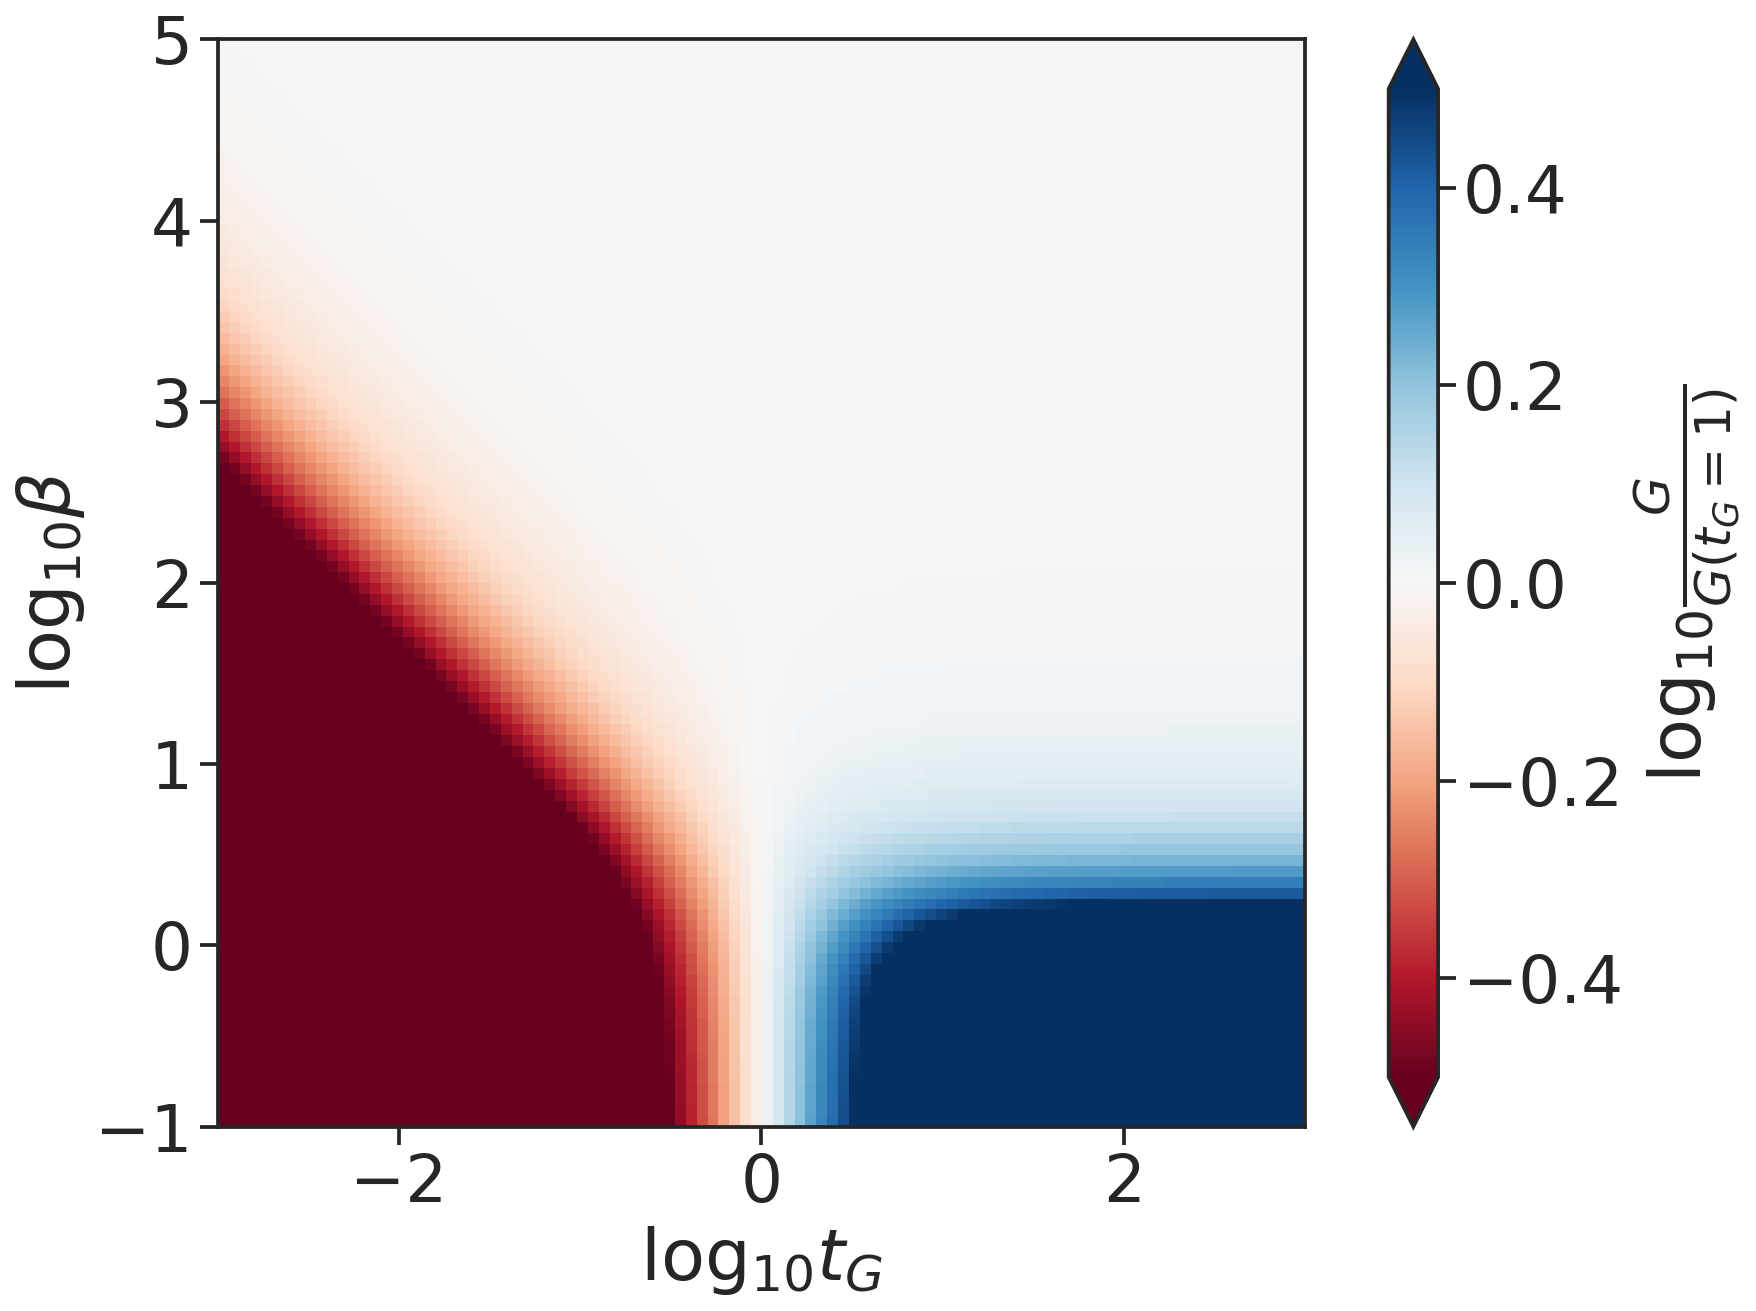

In [ ]:
nn=100
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
r_array=np.zeros([nn,nn])
#1st axis of g_array is kR, second axis is tG
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(1,1*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
#         g_array[i,j]=np.log10(g)
        r_array[i,j]=tr-(tg-g)
#         g_array[i,j]=g_func(tg,tr)
temp=ax.imshow(g_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,cmap='RdBu')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}\beta$')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\log_{10} \frac{G}{G(t_G=1)}$')
# ax.set_yscale('log')
# ax.set_xscale('log')
# handles, labels = ax.get_legend_handles_labels()
plt.savefig('voigt-iffl-invariance.png', bbox_inches='tight')



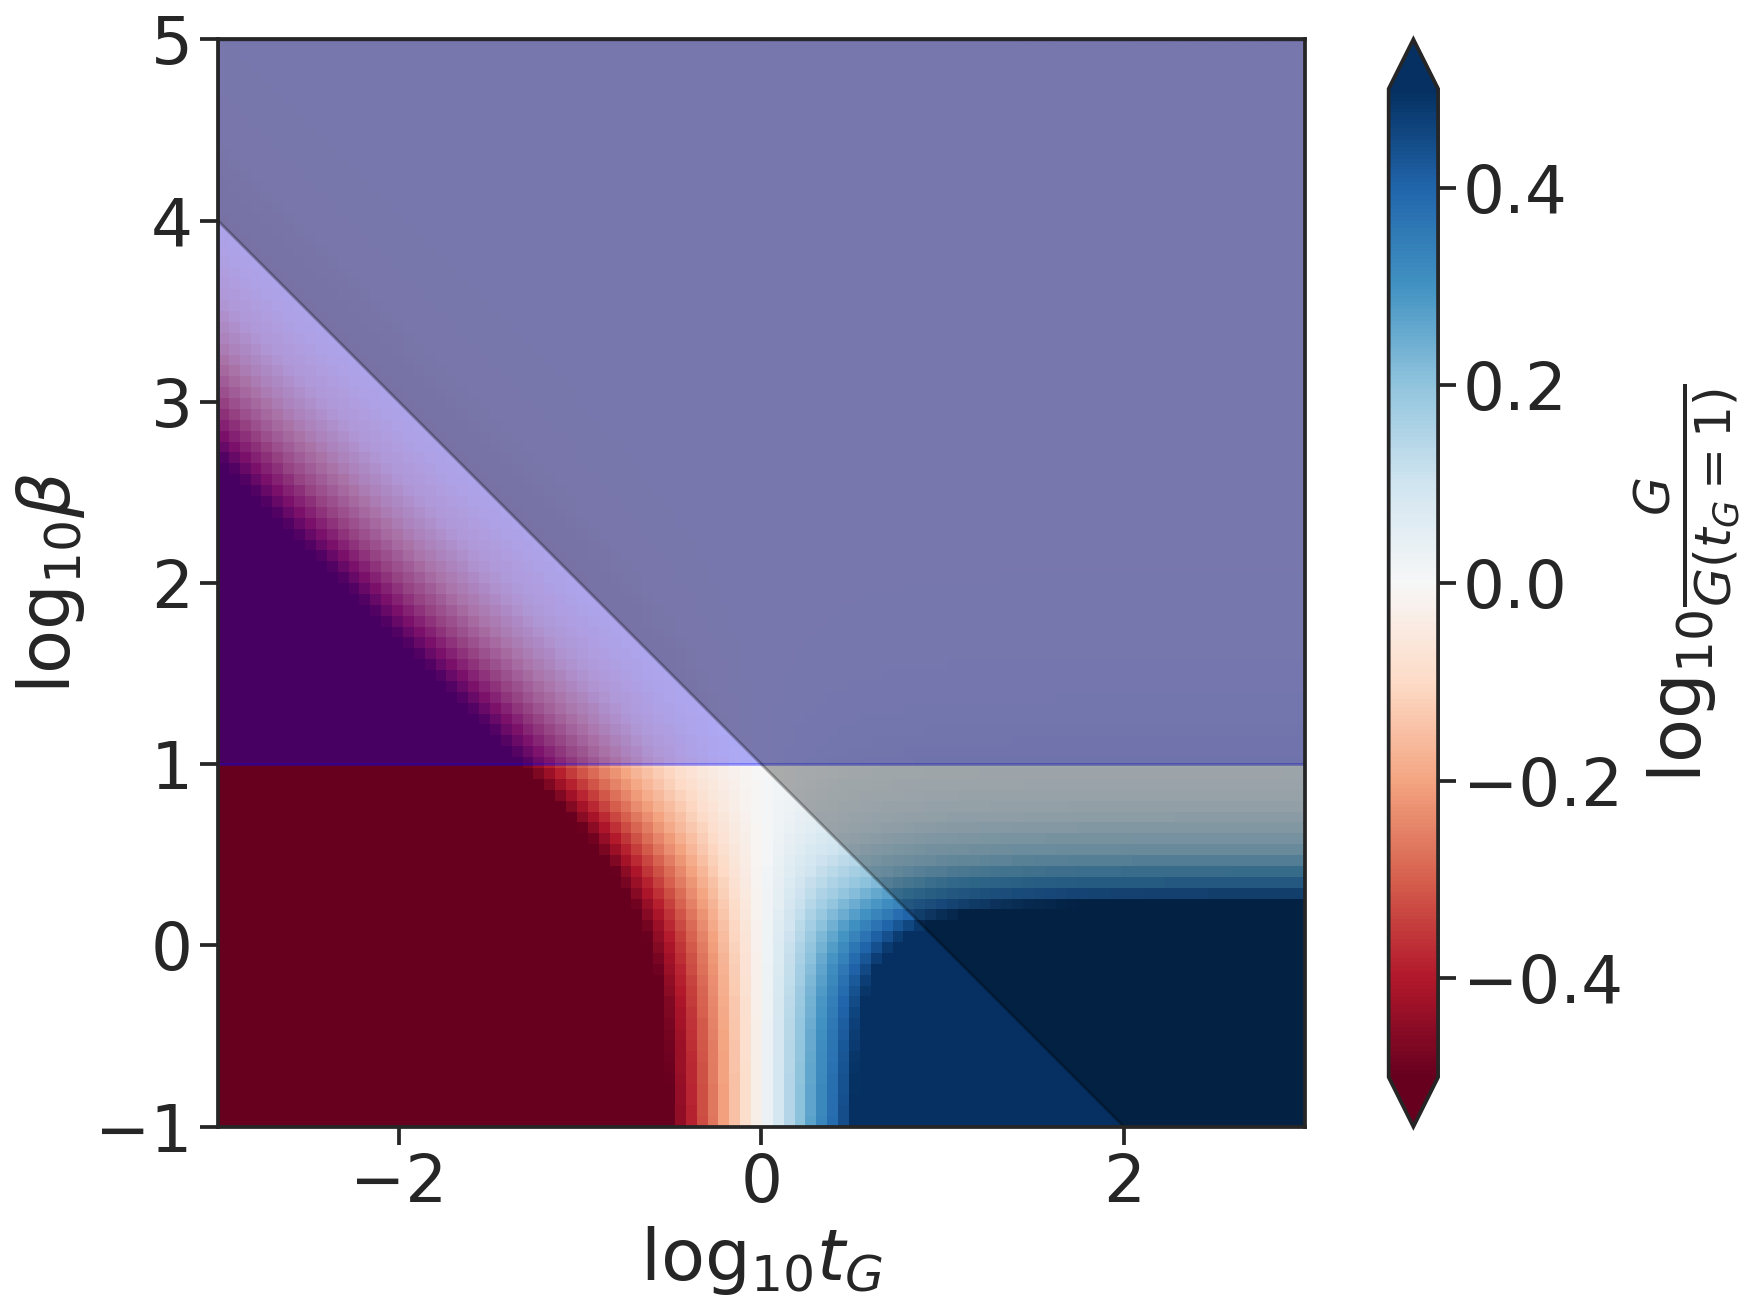

In [ ]:
nn=100
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
r_array=np.zeros([nn,nn])
#1st axis of g_array is kR, second axis is tG
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(1,1*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
#         g_array[i,j]=np.log10(g)
        r_array[i,j]=tr-(tg-g)
#         g_array[i,j]=g_func(tg,tr)
temp=ax.imshow(g_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,cmap='RdBu')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}\beta$')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\log_{10} \frac{G}{G(t_G=1)}$')

th=1 #threshold for dominance
ax.fill_between([xmin,xmax],[th,th],[ymax,ymax],color='b',alpha=0.3) # condition for kR >> 1.
ax.fill_between([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],[ymax,ymax],color='k',alpha=0.3) # condition for kR tG >> 1
ax.set_ylim(ymin,ymax)
# ax.set_yscale('log')
# ax.set_xscale('log')
# handles, labels = ax.get_legend_handles_labels()
plt.savefig('voigt-iffl-invariance-annotated.png', bbox_inches='tight')



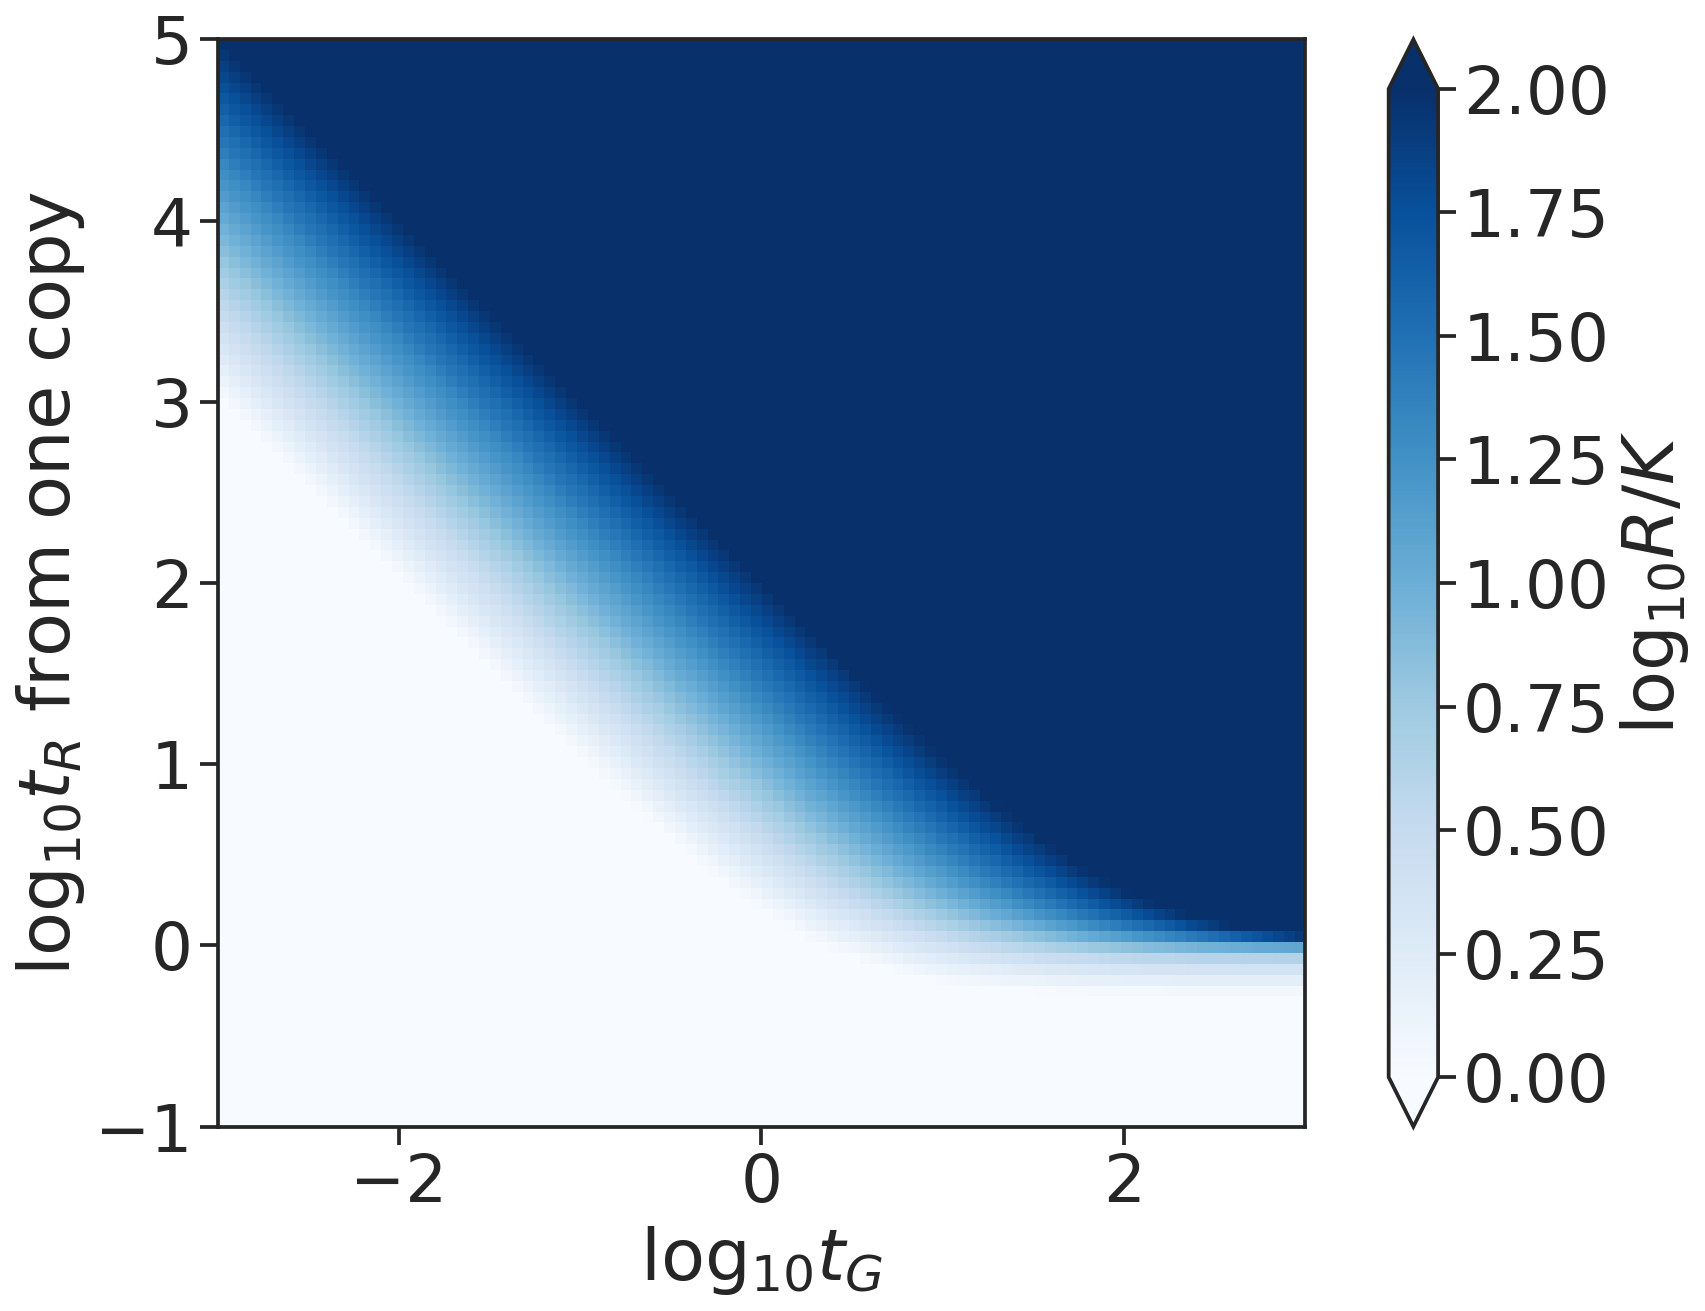

In [ ]:
nn=100
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
r_array=np.zeros([nn,nn])
#1st axis of g_array is kR, second axis is tG
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(1,1*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
#         g_array[i,j]=np.log10(g)
        r_array[i,j]=np.log10(tr-(tg-g))
#         g_array[i,j]=g_func(tg,tr)
temp=ax.imshow(r_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=0,vmax=2,cmap='Blues')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}t_R$ from one copy')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\log_{10} R/K$')
plt.savefig('voigt-iffl-invariance-r.png', bbox_inches='tight')



In [ ]:
r_array_boundary = np.where((r_array > 0.9) & (r_array < 1.1))

In [ ]:

r_array[r_array_boundary[0], r_array_boundary[1]]

array([0.90622687, 0.9242695 , 0.94147469, 0.95782824, 0.97331926,
       0.98794071, 1.00168992, 1.01456904, 1.0265853 , 1.03775124,
       1.04808463, 1.05760841, 1.06635025, 0.92061967, 0.96031107,
       1.00035575, 1.0407913 , 1.08165525, 0.9008    , 0.94814232,
       0.99607147, 1.04461278, 1.09378653, 0.90464331, 0.95600651,
       1.00793871, 1.0604444 , 0.92718802, 0.9811387 , 1.03558423,
       1.09051549, 0.93014278, 0.9856486 , 1.04157209, 1.09789923,
       0.91921736, 0.97572241, 1.03258127, 1.08977899, 0.95536451,
       1.01285398, 1.07063244, 0.92723774, 0.98517546, 1.04336326,
       0.95144503, 1.00993491, 1.0686313 , 0.91300385, 0.97172563,
       1.03063014, 1.08970579, 0.92973413, 0.98880308, 1.04802501,
       0.94390683, 1.00324737, 1.06271643, 0.95595567, 1.01551161,
       1.07517594, 0.90660051, 0.96623056, 1.02595944, 1.08578002,
       0.91523107, 0.97501611, 1.03488528, 1.09483231, 0.9226333 ,
       0.98254553, 1.04252956, 0.92899387, 0.98901127, 1.04909

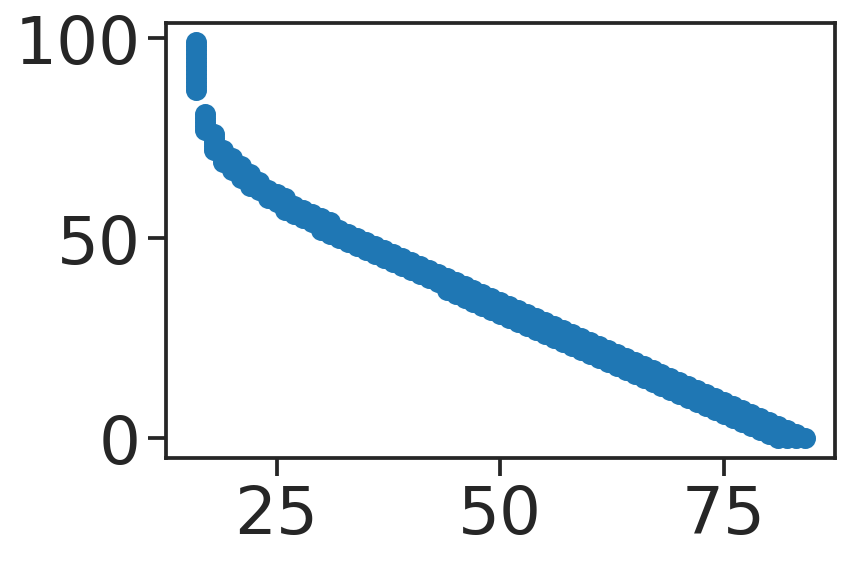

In [ ]:
plt.figure()
plt.scatter(r_array_boundary[0], r_array_boundary[1])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

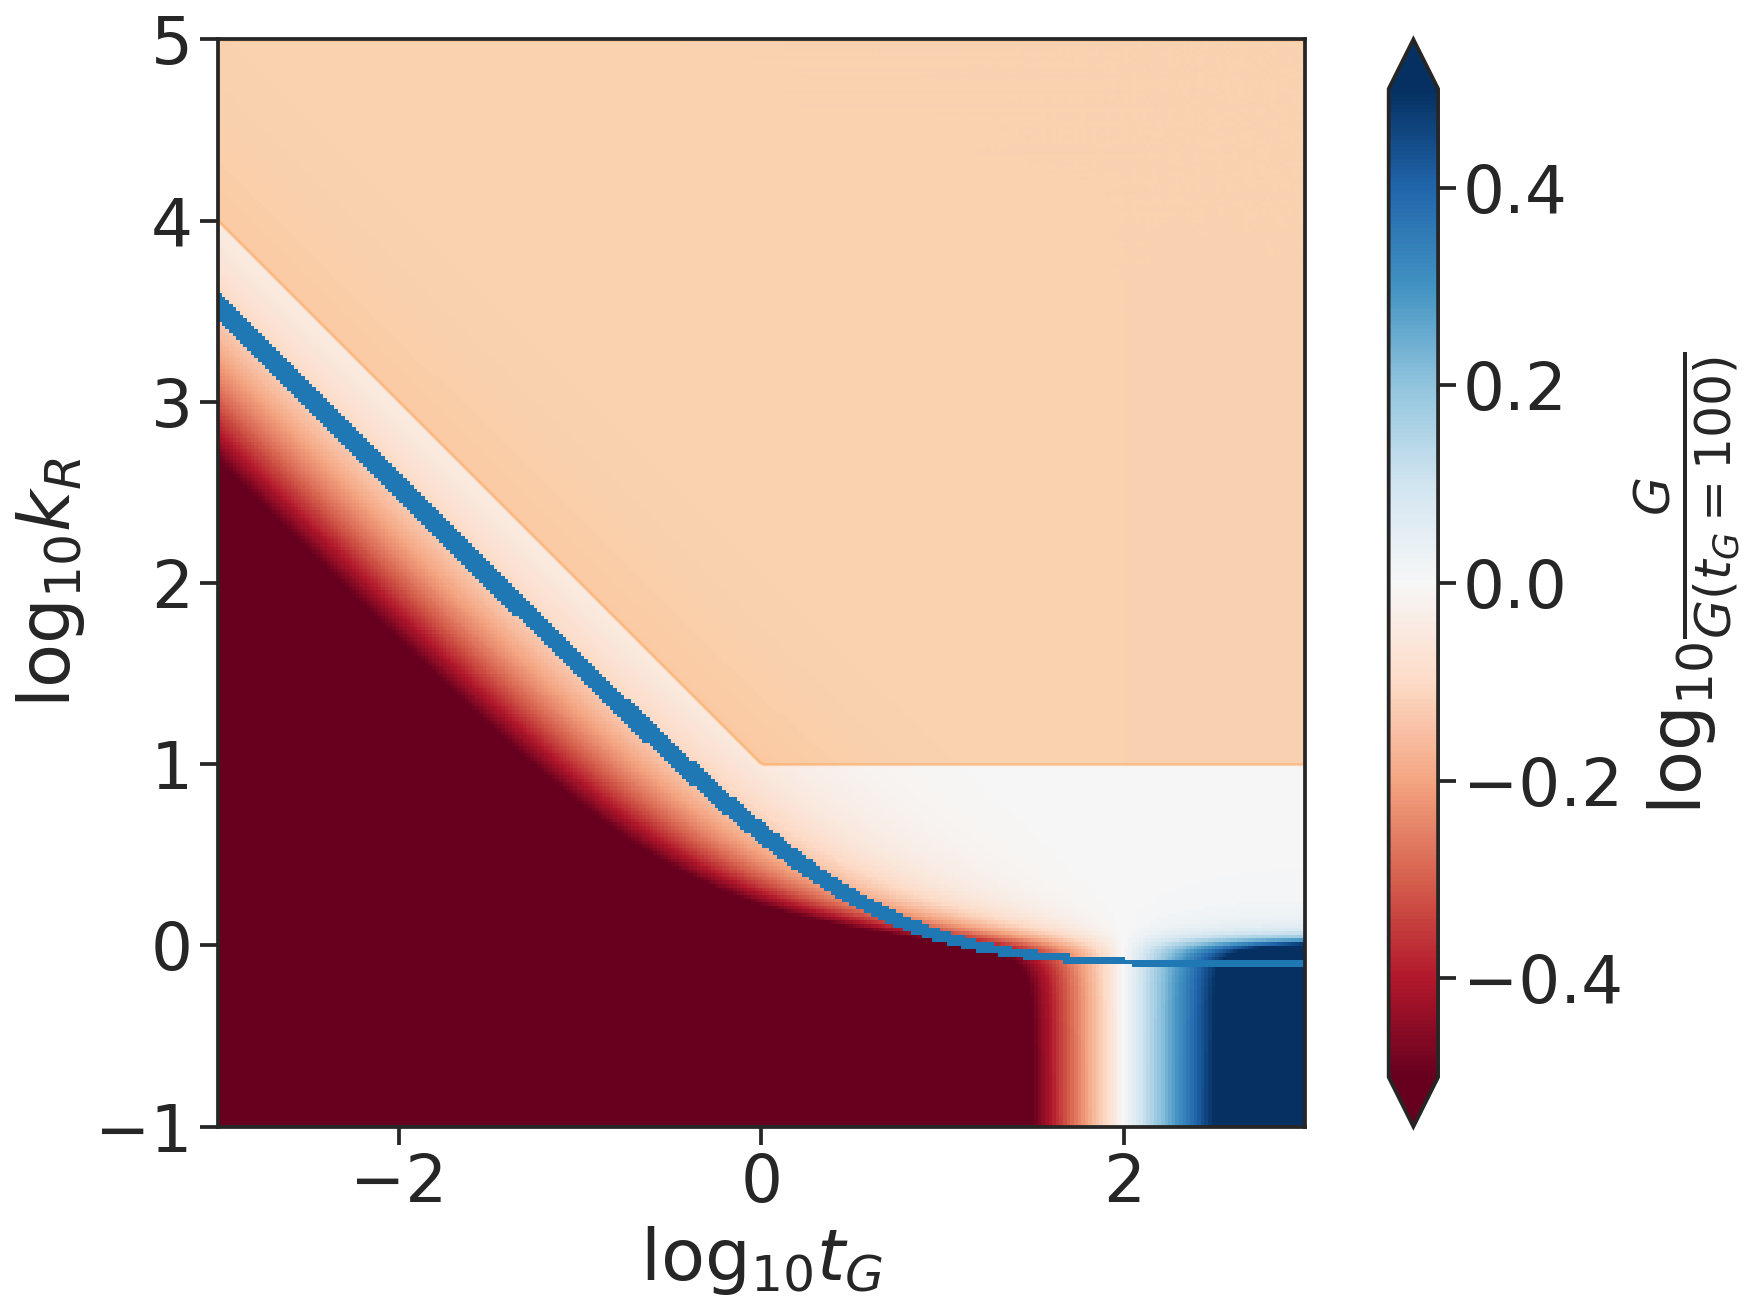

In [ ]:
nn=300
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
r_array=np.zeros([nn,nn,4])
#1st axis of g_array is kR, second axis is tG


color_hex='#1f77b4' #color for the polytope condition boundary
h = color_hex.lstrip('#')
color_rgb=[int(h[i:i+2], 16)/255 for i in (0, 2, 4)]

g_center=100
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(g_center,g_center*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
        
        r_array[i,j]=color_rgb+[.45<np.log10(tr-(tg-g))<.6] # the condition boundary for R >> K condition from polytope analysis
#         g_array[i,j]=g_func(tg,tr)
temp=ax.imshow(g_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,cmap='RdBu')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}k_R$')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\log_{10} \frac{G}{G(t_G='+str(g_center)+')}$')



th=1 #threshold for dominance
# ax.fill_between([xmin,xmax],[th,th],[ymax,ymax],color='b',alpha=0.3) # condition for kR >> 1.
# ax.plot([xmin,xmax],[th,th],color='#1f77b4',lw=7)
# ax.fill_between([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],[ymax,ymax],color='k',alpha=0.3) # condition for kR tG >> 1
# ax.plot([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],color='#ff7f0e',lw=7)
x_val=np.log10(xx)
ax.fill_between(x_val,np.clip(th-x_val,th,np.inf),np.ones(nn)*ymax,color='#ff7f0e' ,alpha=0.3)

ax.set_ylim(ymin,ymax)



ax.imshow(r_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,alpha=1) #condition from polytope analysis

# handles, labels = ax.get_legend_handles_labels()
plt.savefig('voigt-iffl-invariance-annotated'+str(g_center)+'.png', bbox_inches='tight')



from google.colab import files
files.download('voigt-iffl-invariance-annotated'+str(g_center)+'.png') 

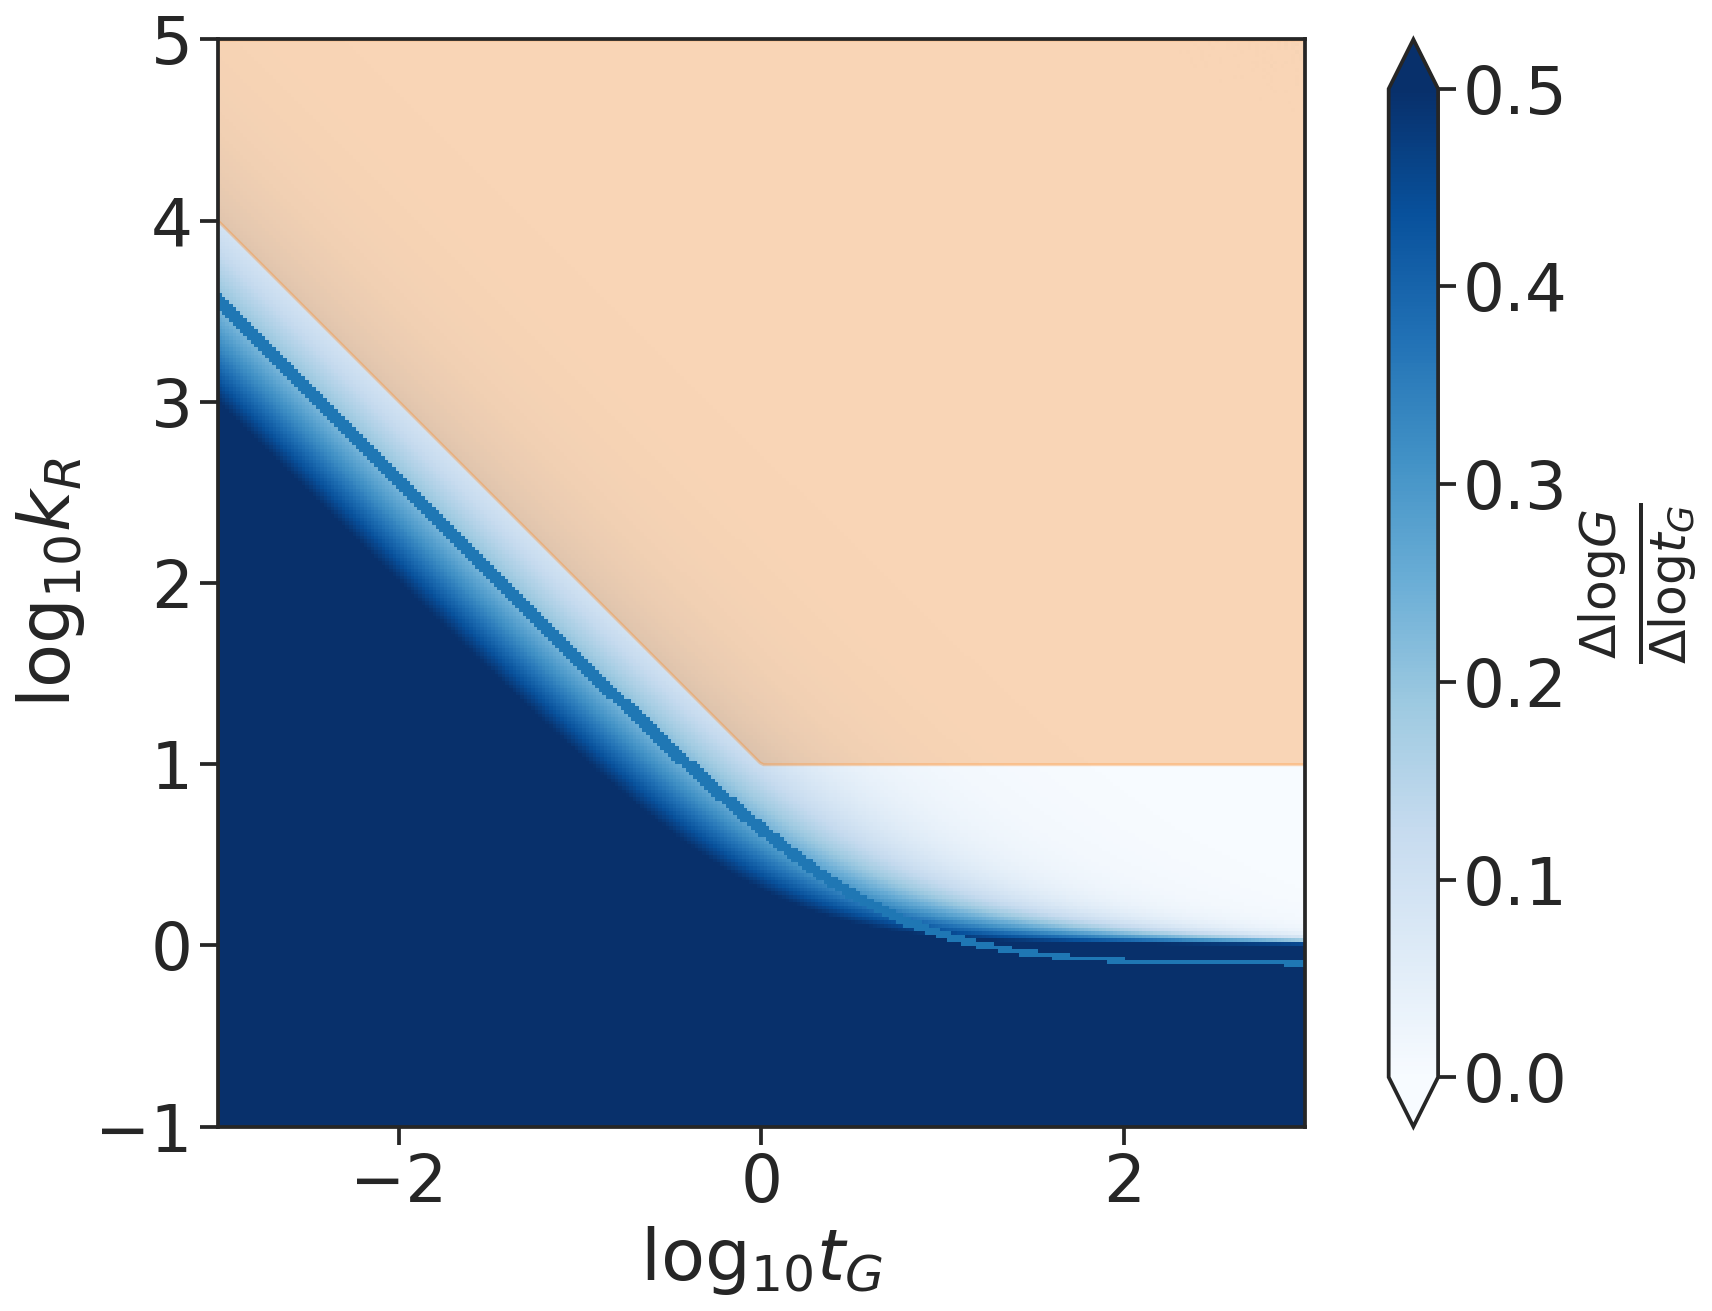

In [ ]:
nn=300
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
dg_array=np.zeros([nn,nn-1])
r_array=np.zeros([nn,nn,4])
#1st axis of g_array is kR, second axis is tG


color_hex='#1f77b4' #color for the polytope condition boundary
h = color_hex.lstrip('#')
color_rgb=[int(h[i:i+2], 16)/255 for i in (0, 2, 4)]

g_center=.01
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(g_center,g_center*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
        
        r_array[i,j]=color_rgb+[.5<np.log10(tr-(tg-g))<.6] # the condition boundary for R >> K condition from polytope analysis
#         g_array[i,j]=g_func(tg,tr)
    dg_array[i,:]=np.diff(g_array[i,:])/(xmax-xmin)*nn
temp=ax.imshow(dg_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=0,vmax=.5,cmap='Blues')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}k_R$')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\frac{\Delta \log G}{\Delta \log t_G}$')



th=1 #threshold for dominance
# ax.fill_between([xmin,xmax],[th,th],[ymax,ymax],color='b',alpha=0.3) # condition for kR >> 1.
# ax.plot([xmin,xmax],[th,th],color='#1f77b4',lw=7)
# ax.fill_between([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],[ymax,ymax],color='k',alpha=0.3) # condition for kR tG >> 1
# ax.plot([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],color='#ff7f0e',lw=7)
x_val=np.log10(xx)
ax.fill_between(x_val,np.clip(th-x_val,th,np.inf),np.ones(nn)*ymax,color='#ff7f0e' ,alpha=0.3)

ax.set_ylim(ymin,ymax)



ax.imshow(r_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,alpha=1) #condition from polytope analysis

# handles, labels = ax.get_legend_handles_labels()
plt.savefig('voigt-iffl-invariance-annotated-log-derivative.png', bbox_inches='tight')

# from google.colab import files
# files.download('voigt-iffl-invariance-annotated-log-derivative.png') 


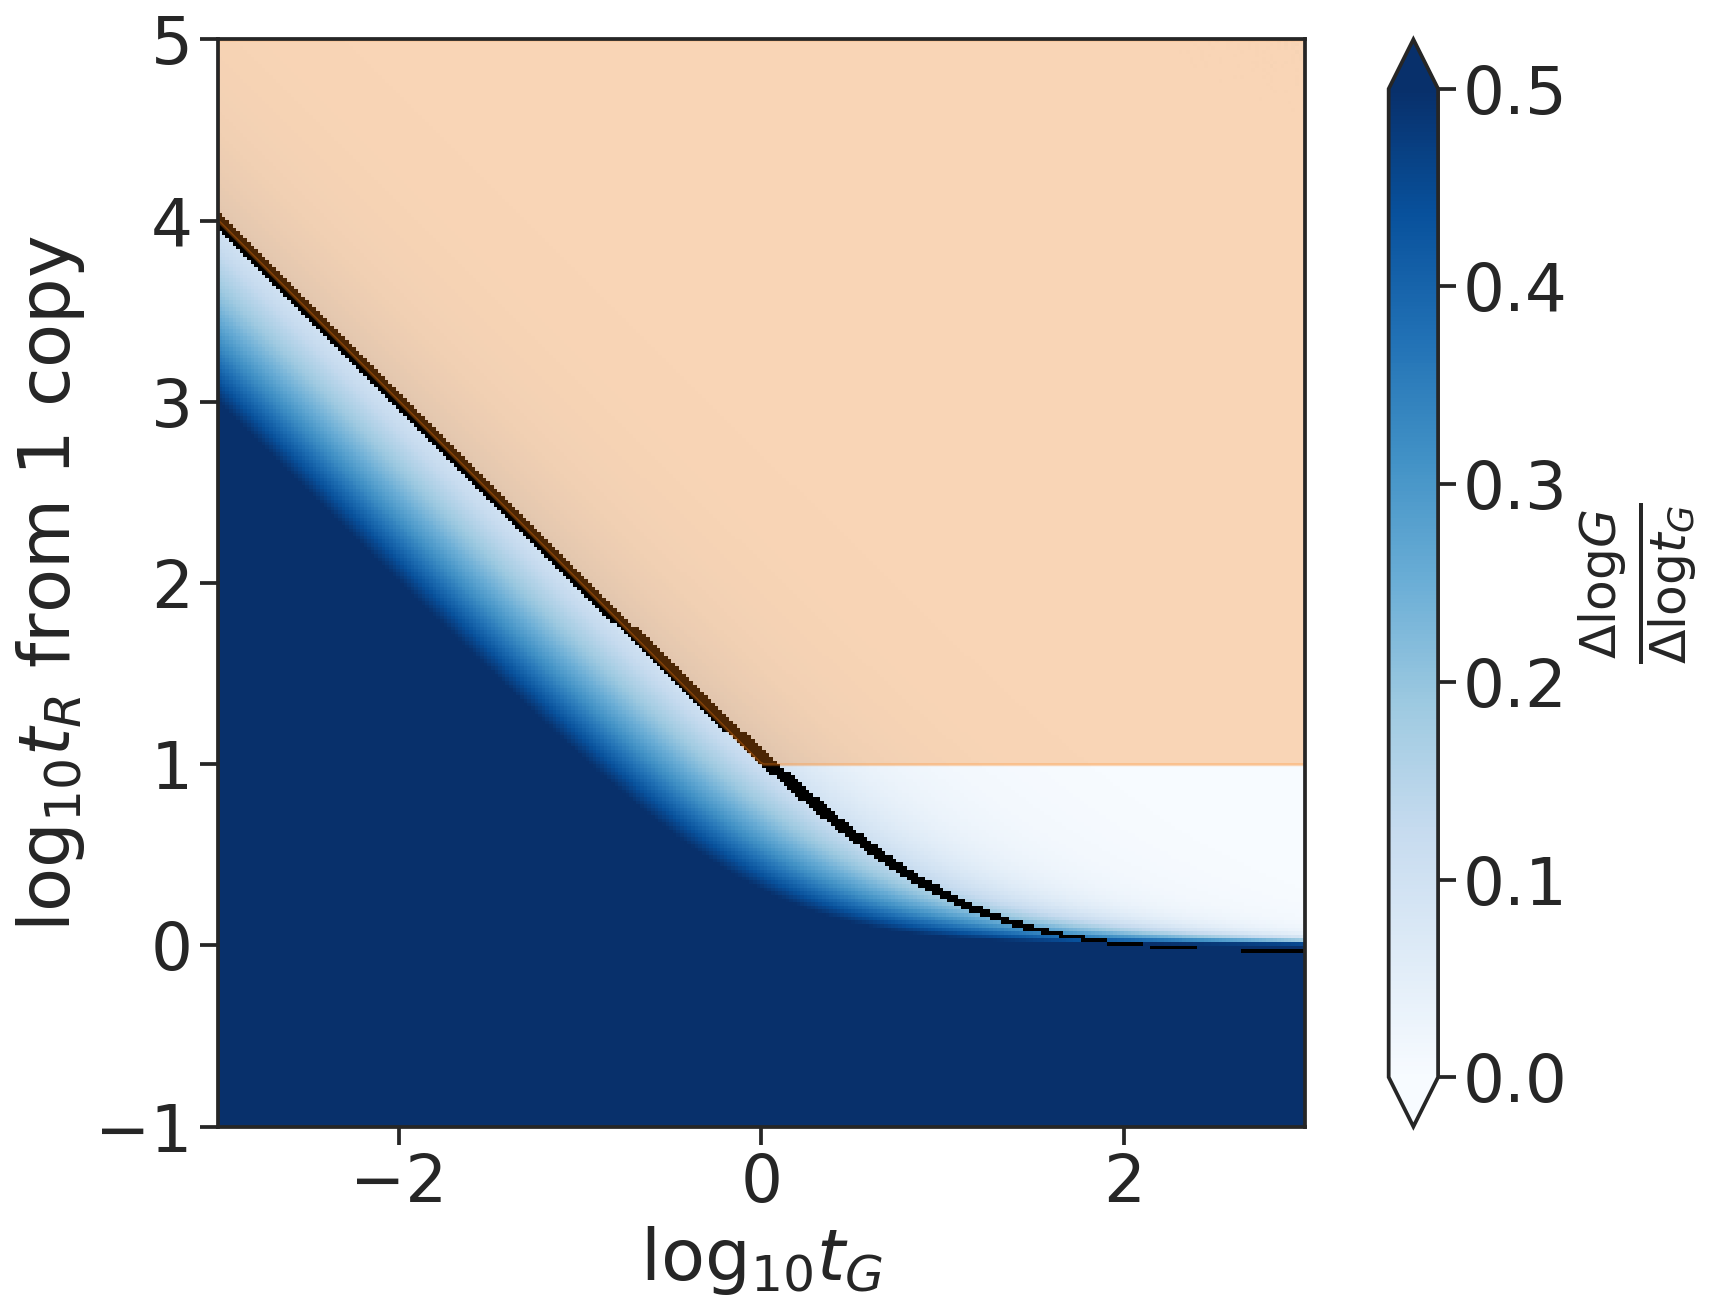

In [ ]:
nn=300
# x is range of tG, y is range of kR
xmin=-3
xmax=3
ymin=-1
ymax=5
xx=np.logspace(xmin,xmax,nn)
yy=np.logspace(ymin,ymax,nn)

fig, ax = plt.subplots(1, 1,figsize=(15,10))
g_array=np.zeros([nn,nn]) # the array for each pixel in the 2d plot. Color of each pixel is defined by 4 numbers, rgb and alpha.
dg_array=np.zeros([nn,nn-1])
r_array=np.zeros([nn,nn,4])
#1st axis of g_array is kR, second axis is tG


color_hex='#1f77b4' #color for the polytope condition boundary
color_hex="#000000"
h = color_hex.lstrip('#')
color_rgb=[int(h[i:i+2], 16)/255 for i in (0, 2, 4)]

g_center=.01
for i in range(nn):
    kr=yy[i]
    for j in range(nn):
        normalizer=g_func(g_center,g_center*kr) # this is G when tG=1, so tR=kr*tG = kr.
        tg=xx[j]
        tr=tg*kr
        g=g_func(tg,tr)
        g_array[i,j]=np.log10(g/normalizer)
        
        r_array[i,j]=color_rgb+[.95<np.log10(tr-(tg-g))<1.05] # the condition boundary for R >> K condition from polytope analysis
#         g_array[i,j]=g_func(tg,tr)
    dg_array[i,:]=np.diff(g_array[i,:])/(xmax-xmin)*nn
temp=ax.imshow(dg_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=0,vmax=.5,cmap='Blues')
ax.set_xlabel(r'$\log_{10}t_G$')
ax.set_ylabel(r'$\log_{10}t_R$ from 1 copy')
cbar = plt.colorbar(temp, ax=ax, extend='both')
cbar.set_label(r'$\frac{\Delta \log G}{\Delta \log t_G}$')



th=1 #threshold for dominance
# ax.fill_between([xmin,xmax],[th,th],[ymax,ymax],color='b',alpha=0.3) # condition for kR >> 1.
# ax.plot([xmin,xmax],[th,th],color='#1f77b4',lw=7)
# ax.fill_between([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],[ymax,ymax],color='k',alpha=0.3) # condition for kR tG >> 1
# ax.plot([xmin,xmax],[th-xmin,(th-xmin)-(xmax-xmin)],color='#ff7f0e',lw=7)
x_val=np.log10(xx)

# sontag region:
ax.fill_between(x_val,np.clip(th-x_val,th,np.inf),np.ones(nn)*ymax,color='#ff7f0e' ,alpha=0.3)

ax.set_ylim(ymin,ymax)


# polytope boundary:
ax.imshow(r_array,origin='lower',extent=(xmin,xmax,ymin,ymax),vmin=-.5,vmax=.5,alpha=1) #condition from polytope analysis

# handles, labels = ax.get_legend_handles_labels()
plt.savefig('voigt-iffl-invariance-annotated-log-derivative.png',dpi=200, bbox_inches='tight')

# from google.colab import files
# files.download('voigt-iffl-invariance-annotated-log-derivative.pdf') 


In [ ]:
from google.colab import files
files.download('voigt-iffl-invariance-annotated-log-derivative.png') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>